# trim_floating_solid
an example for the use of porespy.filters.trim_floating_solid

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

Removes all solid that isn't connected to the edge of the image.

--------------------------------------------------------------------------------
RSA: Adding spheres of size 10
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Number of spheres inserted: 89
Final volume fraction: 0.3016111111111111


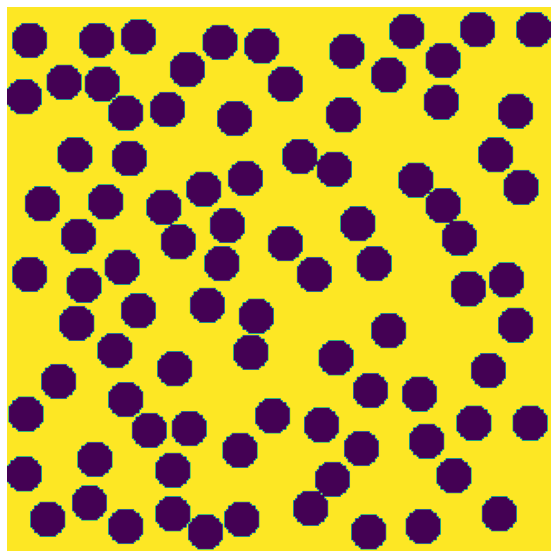

In [2]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=10, volume_fraction=0.3)
im = im < 0.5
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)
conn = 8

Apply filter:

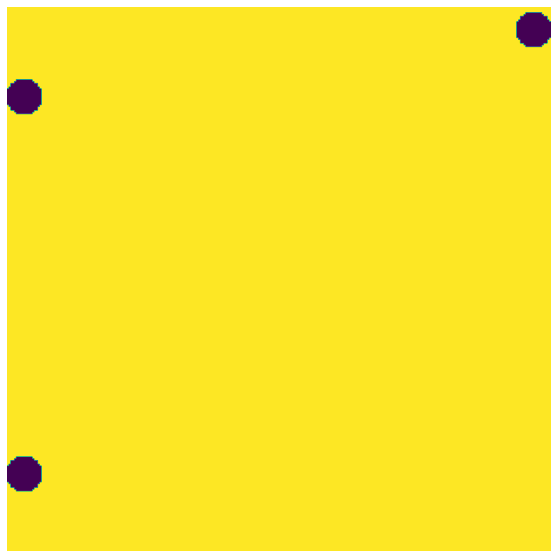

In [3]:
x = ps.filters.trim_floating_solid(im, conn)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(x)